In [40]:
import os
import opendatasets as od

KAGGLE_URL = 'https://www.kaggle.com/datasets/mohit2512/jio-mart-product-items'
DATASET_PATH = '.\dataset'

def fetch_dataset(url = KAGGLE_URL, path = DATASET_PATH):
    if not os.path.isdir(path):
        os.makedirs(path)
    od.download(url, path)

fetch_dataset()

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: vladyslavachernorai
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 2.31M/2.31M [00:01<00:00, 2.31MB/s]

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans

In [49]:
DATASET_PATH = "dataset/jio-mart-product-items/jio_mart_items.csv"
df = pd.read_csv(DATASET_PATH)
df.head(10)

,category,sub_category,href,items,price
0,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0
1,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0
2,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Mosambi 1 kg,69.0
3,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Orange Imported 1 kg,125.0
4,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0
5,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Custard Apple 4 pcs (Approx 750 g - 1000 g),179.0
6,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Pineapple Queen 1 pc (Approx 700 g - 1200 g),84.0
7,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Dates Imported (Approx 400 g - 500 g),175.0
8,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Watermelon Kiran Big 1 pc (Approx. 2800 g - 40...,45.0
9,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Pear Green Indian 6 pcs (Approx 700 g - 1000 g),189.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162313 entries, 0 to 162312
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   category      162313 non-null  object 
 1   sub_category  162313 non-null  object 
 2   href          162313 non-null  object 
 3   items         162280 non-null  object 
 4   price         162282 non-null  float64
dtypes: float64(1), object(4)
memory usage: 6.2+ MB


In [51]:
df.describe()

,price
count,1.622820e+05
mean,1.991633e+03
std,1.593479e+04
min,5.000000e+00
25%,2.840000e+02
50%,4.990000e+02
75%,9.990000e+02
max,3.900000e+06


array([[<AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

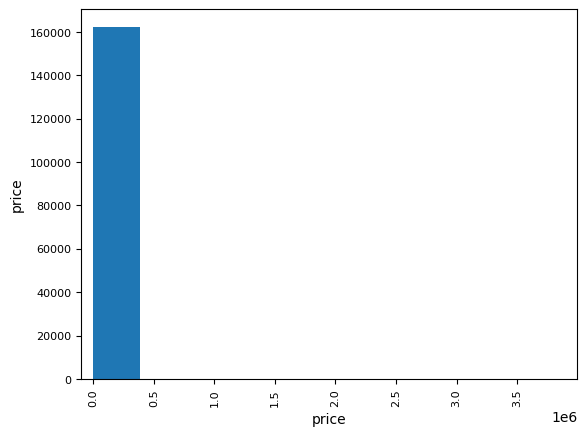

In [52]:
scatter_matrix(dataframe)

In [53]:
num_features = ['price']
cat_features = ['category', 'sub_category', 'href', 'items']

In [74]:
groups = [100, 200, 300]
def grop_scores(Ys):
    group_ids = np.zeros_like(Ys, dtype=int)
    for i, upper_bound in enumerate(groups):
        group_ids[Ys <= upper_bound] = i
    return group_ids

In [75]:
df['temp'] = grop_scores(df['price'])
df

,category,sub_category,href,items,price,temp
0,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Fresh Dates (Pack) (Approx 450 g - 500 g),109.0,2
1,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Tender Coconut Cling Wrapped (1 pc) (Approx 90...,49.0,2
2,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Mosambi 1 kg,69.0,2
3,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Orange Imported 1 kg,125.0,2
4,Groceries,Fruits & Vegetables,https://www.jiomart.com/c/groceries/fruits-veg...,Banana Robusta 6 pcs (Box) (Approx 800 g - 110...,44.0,2
...,...,...,...,...,...,...
162308,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 5.6 gm Ganesha Silver ...,1669.0,0
162309,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 4.58 gm Ganesha Silver...,1391.0,0
162310,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 2.31 gm Ganesha Silver...,834.0,0
162311,Jewellery,Fine Jewellery,https://www.jiomart.com/c/jewellery/fine-jewel...,Reliance Jewels Ag 99.9 7.76 gm Ganesha Silver...,2276.0,0


In [76]:
train_df, test_df = train_test_split(dataframe, test_size=0.2)

In [96]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
])

pipeline = ColumnTransformer([
    ("num", num_pipeline, num_features),
    ("cat", OneHotEncoder(), cat_features)
])



X_train = pipeline.fit_transform(train_df)
Y_train = train_df['price'].values

X_test = pipeline.fit_transform(test_df)
Y_test = test_df['price'].values


In [99]:
def get_acc(model, use_kmeans=True, k=10, ):

    if use_kmeans:
        kmeans = KMeans(n_clusters=k, n_init=10)
        X_clusters = kmeans.fit_transform(X_train)
        X_repr_i = np.argmin(X_clusters, axis=0)
    else:
        X_repr_i = np.random.choice(np.arange(len(X_train)), size=k, replace=False)

    X_repr = X_train[X_repr_i]
    Y_repr = Y_train[X_repr_i]
    model.fit(X_repr, Y_repr)
    Y_hat = model.predict(X_test)
    return ((Y_hat >= 0.5) == Y_test).mean()

In [100]:
n = 100
scores_kmeans = np.array([get_acc(LinearRegression(), True) for _ in range(n)])
scores_random = np.array([get_acc(LinearRegression(), False) for _ in range(n)])
print('Labeling 10 data points from kmeans accuracy:', scores_kmeans.mean())
print('Labeling 10 data points randomly accuracy:', scores_random.mean())

ValueError: X has 30391 features, but LinearRegression is expecting 112415 features as input.

In [102]:
model = LogisticRegression()
model.fit(X_train, Y_train)
f'Accuracy (only LogisticRegression): {model.score(X_test, Y_test)}'

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').